In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("ecg.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [3]:
X = df.drop([140], axis = 1)
y = df[140]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
encoder = Sequential([Dense(64, activation = 'relu', input_shape = (X_train.shape[1],))])
decoder = Sequential([Dense(X_train.shape[1], activation = 'sigmoid')])

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
autoencoder = Sequential([encoder, decoder])

In [8]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [9]:
r = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 64, validation_data= (X_test, X_test))

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0182 - loss: 1.0804 - val_accuracy: 0.0267 - val_loss: 0.7718
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0411 - loss: 0.7673 - val_accuracy: 0.0533 - val_loss: 0.7081
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0691 - loss: 0.7152 - val_accuracy: 0.0793 - val_loss: 0.6880
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0992 - loss: 0.6692 - val_accuracy: 0.0960 - val_loss: 0.6769
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0969 - loss: 0.7129 - val_accuracy: 0.1093 - val_loss: 0.6693
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1154 - loss: 0.6189 - val_accuracy: 0.1140 - val_loss: 0.6636
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1135 - loss: 0.6591 - val_accuracy: 0.1193 - val_loss: 0.6591
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 0.6552 - val_accuracy: 0.1327 - v

In [10]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'loss')

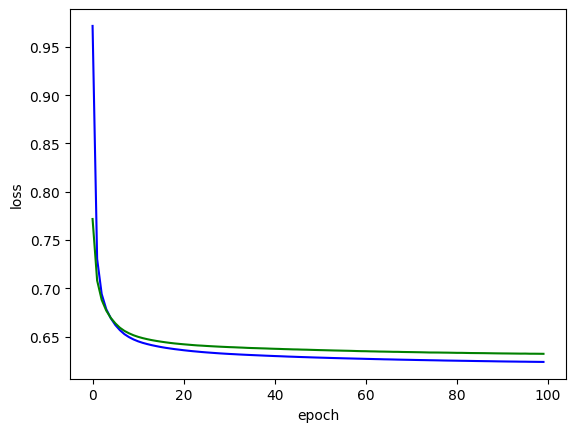

In [11]:
plt.plot(r.history['loss'], label = 'loss', color = 'blue')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend
plt.xlabel('epoch')
plt.ylabel('loss')

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

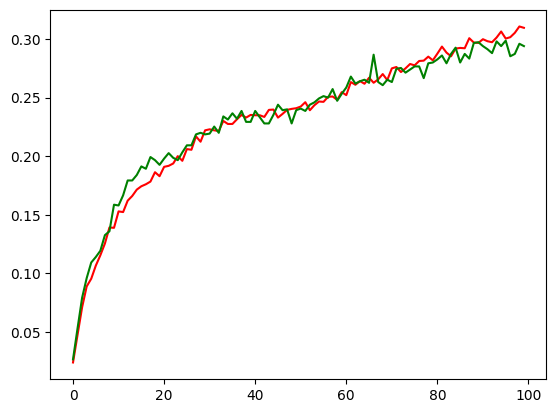

In [12]:
plt.plot(r.history['accuracy'], label = 'acc', color = 'red')
plt.plot(r.history['val_accuracy'], label = 'val_acc', color = 'green')
plt.legend

In [13]:
loss = autoencoder.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2913 - loss: 0.6193
Test Loss: [0.6320996284484863, 0.2939999997615814]


In [14]:
decoded_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 95)

outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[575  47]
 [850  28]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.40      0.92      0.56       622
         1.0       0.37      0.03      0.06       878

    accuracy                           0.40      1500
   macro avg       0.39      0.48      0.31      1500
weighted avg       0.39      0.40      0.27      1500



In [15]:
num_outliers = np.sum(outliers)
num_anomalies = np.sum(y_test[outliers] == 1)

In [16]:
print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 28
